# 导库

In [1]:
import pandas as pd
import numpy as np
import re 
import xgboost as xgb 
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.cross_validation import KFold

# 读数据 

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# 查看数据

In [3]:
train.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
301,302,1,3,"McCoy, Mr. Bernard",male,NaN,2,0,367226,23.25,NaN,Q
465,466,0,3,"Goncalves, Mr. Manuel Estanslas",male,38.0,0,0,SOTON/O.Q. 3101306,7.05,NaN,S
785,786,0,3,"Harmer, Mr. Abraham (David Lishin)",male,25.0,0,0,374887,7.25,NaN,S


In [4]:
test.sample(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
287,1179,1,"Snyder, Mr. John Pillsbury",male,24.0,1,0,21228,82.2667,B45,S
167,1059,3,"Ford, Mr. Edward Watson",male,18.0,2,2,W./C. 6608,34.3750,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
full_data = [train,test]

In [9]:
# 首先把名字的长度作为一项
for data in full_data:
    data["Name_length"] = data["Name"].apply(len)
    data["Has_Cabin"] = data["Cabin"].apply(lambda x: 0 if type(x)==float else 1)
    data["FamilySize"] = data["SibSp"] + data["Parch"] + 1

In [10]:
train.loc[train["FamilySize"]==1]["Fare"]

2       7.9250
4       8.0500
5       8.4583
6      51.8625
11     26.5500
12      8.0500
14      7.8542
15     16.0000
17     13.0000
19      7.2250
20     26.0000
21     13.0000
22      8.0292
23     35.5000
26      7.2250
28      7.8792
29      7.8958
30     27.7208
32      7.7500
33     10.5000
36      7.2292
37      8.0500
42      7.8958
44      7.8792
45      8.0500
47      7.7500
51      7.8000
55     35.5000
56     10.5000
57      7.2292
        ...   
840     7.9250
841    10.5000
842    31.0000
843     6.4375
844     8.6625
845     7.5500
847     7.8958
851     7.7750
857    26.5500
859     7.2292
862    25.9292
864    13.0000
865    13.0000
867    50.4958
868     9.5000
870     7.8958
872     5.0000
873     9.0000
875     7.2250
876     9.8458
877     7.8958
878     7.8958
881     7.8958
882    10.5167
883    10.5000
884     7.0500
886    13.0000
887    30.0000
889    30.0000
890     7.7500
Name: Fare, Length: 537, dtype: float64

In [141]:
for data in full_data:
    data["IsAlone"] = 0
    data.loc[data["FamilySize"]==1,"IsAlone"] = 1

In [161]:
test["IsAlone"] = 0

In [162]:
test.loc[train["FamilySize"] == 1,"IsAlone"] = 1

In [163]:
test["IsAlone"]

0      0
1      0
2      1
3      0
4      1
5      1
6      1
7      0
8      0
9      0
10     0
11     1
12     1
13     0
14     1
15     1
16     0
17     1
18     0
19     1
20     1
21     1
22     1
23     1
24     0
25     0
26     1
27     0
28     1
29     1
      ..
388    1
389    1
390    0
391    1
392    0
393    0
394    0
395    1
396    1
397    1
398    1
399    1
400    1
401    1
402    0
403    0
404    1
405    0
406    1
407    0
408    1
409    0
410    1
411    1
412    0
413    1
414    1
415    1
416    0
417    0
Name: IsAlone, Length: 418, dtype: int64

In [12]:
for data in full_data:
    data["Embarked"] = data["Embarked"].fillna("S")

In [13]:
test["Fare"].fillna(train["Fare"].median())


0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
5        9.2250
6        7.6292
7       29.0000
8        7.2292
9       24.1500
10       7.8958
11      26.0000
12      82.2667
13      26.0000
14      61.1750
15      27.7208
16      12.3500
17       7.2250
18       7.9250
19       7.2250
20      59.4000
21       3.1708
22      31.6833
23      61.3792
24     262.3750
25      14.5000
26      61.9792
27       7.2250
28      30.5000
29      21.6792
         ...   
388      7.7500
389     21.0750
390     93.5000
391     39.4000
392     20.2500
393     10.5000
394     22.0250
395     60.0000
396      7.2500
397     79.2000
398      7.7750
399      7.7333
400    164.8667
401     21.0000
402     59.4000
403     47.1000
404     27.7208
405     13.8625
406     10.5000
407    211.5000
408      7.7208
409     13.7750
410      7.7500
411     90.0000
412      7.7750
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418,

In [14]:
train["CategoricalFare"] = pd.qcut(train["Fare"],4)

In [15]:
train["CategoricalFare"].value_counts()

(7.91, 14.454]     224
(-0.001, 7.91]     223
(31.0, 512.329]    222
(14.454, 31.0]     222
Name: CategoricalFare, dtype: int64

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Name_length    418 non-null int64
Has_Cabin      418 non-null int64
FamilySize     418 non-null int64
IsAlone        418 non-null int64
dtypes: float64(2), int64(8), object(5)
memory usage: 49.1+ KB


In [17]:
# 年龄用 随机值,就是平均值在方差范围内的随机值
for data in full_data:
    age_avg = data["Age"].mean()
    age_std = data["Age"].std()
    age_null_count = data["Age"].isnull().sum()
    print(age_null_count)
    age_null_random_list = np.random.randint(age_avg-age_std,age_avg+age_std,size=age_null_count)
    print(age_null_random_list)
    print((data.loc[data["Age"].isnull()]))
    data.loc[data["Age"].isnull(),"Age"] = age_null_random_list
    data["Age"] = data["Age"].astype(int)

177
[16 23 25 43 26 26 35 23 39 18 21 24 21 35 38 29 36 31 38 19 25 27 24 34 43
 29 26 32 18 21 16 20 34 43 16 38 40 16 34 30 38 42 17 36 33 26 28 21 42 19
 25 23 19 30 32 33 22 29 20 29 35 43 29 16 37 22 42 35 24 30 34 23 20 43 32
 41 31 30 21 42 19 39 29 26 32 39 17 28 31 25 29 22 24 22 33 20 24 40 32 30
 38 42 16 22 40 28 38 26 33 30 39 33 26 27 18 27 17 36 24 39 34 34 15 25 38
 21 35 36 33 43 24 31 20 43 21 37 23 18 20 42 33 38 29 33 27 35 37 26 35 40
 20 27 15 22 38 37 36 22 40 43 18 31 26 31 23 29 16 21 37 23 34 33 25 20 39
 41 21]
     PassengerId  Survived  Pclass  \
5              6         0       3   
17            18         1       2   
19            20         1       3   
26            27         0       3   
28            29         1       3   
29            30         0       3   
31            32         1       1   
32            33         1       3   
36            37         1       3   
42            43         0       3   
45            46         0       3   


     PassengerId  Pclass                                               Name  \
10           902       3                                   Ilieff, Mr. Ylio   
22           914       1               Flegenheim, Mrs. Alfred (Antoinette)   
29           921       3                                  Samaan, Mr. Elias   
33           925       3  Johnston, Mrs. Andrew G (Elizabeth Lily" Watson)"   
36           928       3                                Roth, Miss. Sarah A   
39           931       3                                      Hee, Mr. Ling   
41           933       1                        Franklin, Mr. Thomas Parham   
47           939       3                           Shaughnessy, Mr. Patrick   
54           946       2                  Mangiavacchi, Mr. Serafino Emilio   
58           950       3                          Davison, Mr. Thomas Henry   
65           957       2  Corey, Mrs. Percy C (Mary Phyllis Elizabeth Mi...   
76           968       3                            

In [18]:
train["CategoricalAge"] = pd.cut(train["Age"],5)

In [19]:
train["CategoricalAge"].describe()

count              891
unique               5
top       (16.0, 32.0]
freq               447
Name: CategoricalAge, dtype: object

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null int32
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Name_length    418 non-null int64
Has_Cabin      418 non-null int64
FamilySize     418 non-null int64
IsAlone        418 non-null int64
dtypes: float64(1), int32(1), int64(8), object(5)
memory usage: 47.4+ KB


In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_length,Has_Cabin,FamilySize,IsAlone,CategoricalFare,CategoricalAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,23,0,2,0,"(-0.001, 7.91]","(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,51,1,2,0,"(31.0, 512.329]","(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,22,0,1,0,"(7.91, 14.454]","(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,44,1,2,0,"(31.0, 512.329]","(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,24,0,1,0,"(7.91, 14.454]","(32.0, 48.0]"


In [24]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

In [25]:
for data in full_data:
    data["Title"] = data["Name"].apply(get_title)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_length,Has_Cabin,FamilySize,IsAlone,CategoricalFare,CategoricalAge,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,23,0,2,0,"(-0.001, 7.91]","(16.0, 32.0]",Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,51,1,2,0,"(31.0, 512.329]","(32.0, 48.0]",Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,22,0,1,0,"(7.91, 14.454]","(16.0, 32.0]",Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,44,1,2,0,"(31.0, 512.329]","(32.0, 48.0]",Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,24,0,1,0,"(7.91, 14.454]","(32.0, 48.0]",Mr


In [27]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace(['Mlle'], 'Miss')
    dataset['Title'] = dataset['Title'].replace(['Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace(['Mme'], 'Mrs')

In [30]:
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_length,Has_Cabin,FamilySize,IsAlone,CategoricalFare,CategoricalAge,Title
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14,5,2,CA 2144,46.9000,NaN,S,27,0,8,0,"(31.0, 512.329]","(-0.08, 16.0]",Mr
711,712,0,1,"Klaber, Mr. Herman",male,37,0,0,113028,26.5500,C124,S,18,1,1,0,"(14.454, 31.0]","(32.0, 48.0]",Mr
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19,0,0,348124,7.6500,F G73,S,42,1,1,0,"(-0.001, 7.91]","(16.0, 32.0]",Mr
729,730,0,3,"Ilmakangas, Miss. Pieta Sofia",female,25,1,0,STON/O2. 3101271,7.9250,NaN,S,29,0,2,0,"(7.91, 14.454]","(16.0, 32.0]",Miss
464,465,0,3,"Maisner, Mr. Simon",male,24,0,0,A/S 2816,8.0500,NaN,S,18,0,1,0,"(7.91, 14.454]","(16.0, 32.0]",Mr
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1,1,1,347742,11.1333,NaN,S,28,0,3,0,"(7.91, 14.454]","(-0.08, 16.0]",Miss
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,0,0,27042,30.0000,A23,S,36,1,1,0,"(14.454, 31.0]","(64.0, 80.0]",Mr
278,279,0,3,"Rice, Master. Eric",male,7,4,1,382652,29.1250,NaN,Q,18,0,6,0,"(14.454, 31.0]","(-0.08, 16.0]",Master
362,363,0,3,"Barbara, Mrs. (Catherine David)",female,45,0,1,2691,14.4542,NaN,C,31,0,2,0,"(7.91, 14.454]","(32.0, 48.0]",Mrs
154,155,0,3,"Olsen, Mr. Ole Martin",male,21,0,0,Fa 265302,7.3125,NaN,S,21,0,1,0,"(-0.001, 7.91]","(16.0, 32.0]",Mr


In [31]:
# 性别 编码
for data in full_data:
    data["Sex"] = data["Sex"].map({"female":0,"male":1})
    data["Title"] = data["Title"].map({"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare":5})
    data["Title"] = data["Title"].fillna(0)
    data["Embarked"] = data["Embarked"].map( {'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_length,Has_Cabin,FamilySize,IsAlone,CategoricalFare,CategoricalAge,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,0,23,0,2,0,"(-0.001, 7.91]","(16.0, 32.0]",1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,1,51,1,2,0,"(31.0, 512.329]","(32.0, 48.0]",3
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,0,22,0,1,0,"(7.91, 14.454]","(16.0, 32.0]",2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,0,44,1,2,0,"(31.0, 512.329]","(32.0, 48.0]",3
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,0,24,0,1,0,"(7.91, 14.454]","(32.0, 48.0]",1


In [57]:
train["CategoricalFare"].unique()

[(-0.001, 7.91], (31.0, 512.329], (7.91, 14.454], (14.454, 31.0]]
Categories (4, interval[float64]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [115]:
test["Fare"].unique()

array([   7.8292,    7.    ,    9.6875,    8.6625,   12.2875,    9.225 ,
          7.6292,   29.    ,    7.2292,   24.15  ,    7.8958,   26.    ,
         82.2667,   61.175 ,   27.7208,   12.35  ,    7.225 ,    7.925 ,
         59.4   ,    3.1708,   31.6833,   61.3792,  262.375 ,   14.5   ,
         61.9792,   30.5   ,   21.6792,   31.5   ,   20.575 ,   23.45  ,
         57.75  ,    8.05  ,    9.5   ,   56.4958,   13.4167,   26.55  ,
          7.85  ,   13.    ,   52.5542,   29.7   ,    7.75  ,   76.2917,
         15.9   ,   60.    ,   15.0333,   23.    ,  263.    ,   15.5792,
         29.125 ,    7.65  ,   16.1   ,   13.5   ,    7.725 ,   21.    ,
          7.8792,   42.4   ,   28.5375,  211.5   ,   25.7   ,   15.2458,
        221.7792,   10.7083,   14.4542,   13.9   ,    7.775 ,   52.    ,
          7.7958,   78.85  ,    7.8542,   55.4417,    8.5167,   22.525 ,
          7.8208,    8.7125,   15.0458,    7.7792,   31.6792,    7.2833,
          6.4375,   16.7   ,   75.2417,   15.75  , 

In [116]:
train["Fare"] = pd.read_csv("train.csv")["Fare"]
test["Fare"]  = pd.read_csv("test.csv")["Fare"]                                        

In [126]:
for data in full_data:
    data.loc[data['Fare'] <= 7.91, 'Fare'] = 0
    print("---")
    data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare']= 1
    data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']= 2
    data.loc[ data['Fare'] > 31, 'Fare']= 3
    data['Fare'] = data['Fare'].astype(int)

---
---


In [132]:
test["Fare"]  = pd.read_csv("test.csv")["Fare"] 
test["Fare"] = test["Fare"].fillna(pd.read_csv("train.csv")["Fare"].median())
test.loc[test['Fare'] <= 7.91, 'Fare'] = 0
test.loc[(test['Fare'] > 7.91) & (test['Fare'] <= 14.454), 'Fare']= 1
test.loc[(test['Fare'] > 14.454) & (test['Fare'] <= 31), 'Fare']= 2
test.loc[ test['Fare'] > 31, 'Fare']= 3
test['Fare'] = test['Fare'].astype(int)

In [133]:
test["Fare"]

0      0
1      0
2      1
3      1
4      1
5      1
6      0
7      2
8      0
9      2
10     0
11     2
12     3
13     2
14     3
15     2
16     1
17     0
18     1
19     0
20     3
21     0
22     3
23     3
24     3
25     2
26     3
27     0
28     2
29     2
      ..
388    0
389    2
390    3
391    3
392    2
393    1
394    2
395    3
396    0
397    3
398    0
399    0
400    3
401    2
402    3
403    3
404    2
405    1
406    1
407    3
408    0
409    1
410    0
411    3
412    0
413    1
414    3
415    0
416    1
417    2
Name: Fare, Length: 418, dtype: int32

In [87]:
for dataset in full_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4 

In [90]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Name_length',
       'Has_Cabin', 'FamilySize', 'IsAlone', 'CategoricalFare',
       'CategoricalAge', 'Title'],
      dtype='object')

In [89]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Name_length', 'Has_Cabin',
       'FamilySize', 'IsAlone', 'Title'],
      dtype='object')

In [94]:
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
train = train.drop(drop_elements, axis = 1)
test  = test.drop(drop_elements, axis = 1)

In [95]:
train = train.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)

KeyError: "labels ['CategoricalAge' 'CategoricalFare'] not contained in axis"

In [96]:
train.head(5)

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Name_length,Has_Cabin,FamilySize,IsAlone,Title
0,0,3,1,1,0,0,0,23,0,2,0,1
1,1,1,0,2,0,0,1,51,1,2,0,3
2,1,3,0,1,0,0,0,22,0,1,0,2
3,1,1,0,2,0,0,0,44,1,2,0,3
4,0,3,1,2,0,0,0,24,0,1,0,1


In [121]:
test.head()

,Pclass,Sex,Age,Parch,Fare,Embarked,Name_length,Has_Cabin,FamilySize,IsAlone,Title
0,3,1,2,0,7.8292,2,16,0,1,0,1
1,3,0,2,0,7.0000,0,32,0,2,0,3
2,2,1,3,0,9.6875,2,25,0,1,0,1
3,3,1,1,0,8.6625,0,16,0,1,0,1
4,3,0,1,1,12.2875,0,44,0,3,0,3


In [164]:
train.to_csv("Processed_train.csv",index=False)
test.to_csv("Processed_test.csv",index=False)

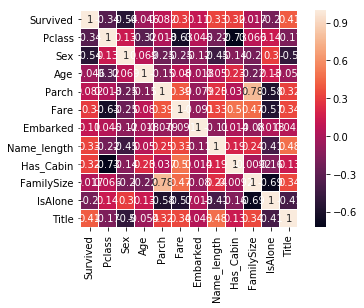

In [165]:
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,linecolor="w",annot=True)

In [166]:
train["IsAlone"].value_counts()

1    537
0    354
Name: IsAlone, dtype: int64

In [167]:
train.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Name_length,Has_Cabin,FamilySize,IsAlone,Title
0,0,3,1,1,0,0,0,23,0,2,0,1
1,1,1,0,2,0,3,1,51,1,2,0,3
2,1,3,0,1,0,1,0,22,0,1,1,2
3,1,1,0,2,0,3,0,44,1,2,0,3
4,0,3,1,2,0,1,0,24,0,1,1,1


In [168]:
test.head()

,Pclass,Sex,Age,Parch,Fare,Embarked,Name_length,Has_Cabin,FamilySize,IsAlone,Title
0,3,1,2,0,0,2,16,0,1,0,1
1,3,0,2,0,0,0,32,0,2,0,3
2,2,1,3,0,1,2,25,0,1,1,1
3,3,1,1,0,1,0,16,0,1,0,1
4,3,0,1,1,1,0,44,0,3,1,3


In [171]:
train.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Name_length,Has_Cabin,FamilySize,IsAlone,Title
0,0,3,1,1,0,0,0,23,0,2,0,1
1,1,1,0,2,0,3,1,51,1,2,0,3
2,1,3,0,1,0,1,0,22,0,1,1,2
3,1,1,0,2,0,3,0,44,1,2,0,3
4,0,3,1,2,0,1,0,24,0,1,1,1


In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [173]:
# 把 训练集 测试集选出来
X_train = train.drop("Survived",axis=1)
Y_train = train["Survived"]

In [175]:
X_train.head()

,Pclass,Sex,Age,Parch,Fare,Embarked,Name_length,Has_Cabin,FamilySize,IsAlone,Title
0,3,1,1,0,0,0,23,0,2,0,1
1,1,0,2,0,3,1,51,1,2,0,3
2,3,0,1,0,1,0,22,0,1,1,2
3,1,0,2,0,3,0,44,1,2,0,3
4,3,1,2,0,1,0,24,0,1,1,1


In [176]:
Y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [177]:
X_test = test.copy()

In [179]:
X_test.head()

,Pclass,Sex,Age,Parch,Fare,Embarked,Name_length,Has_Cabin,FamilySize,IsAlone,Title
0,3,1,2,0,0,2,16,0,1,0,1
1,3,0,2,0,0,0,32,0,2,0,3
2,2,1,3,0,1,2,25,0,1,1,1
3,3,1,1,0,1,0,16,0,1,0,1
4,3,0,1,1,1,0,44,0,3,1,3


In [180]:
# 逻辑回归
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)

In [182]:
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.140000000000001

In [183]:
logreg.coef_

array([[-0.4666984 , -2.00164667, -0.51580554,  0.15998742,  0.27356082,
         0.30070843,  0.02705346,  0.81644989, -0.51931603, -0.19549381,
         0.47568939]])

In [184]:
logreg.intercept_

array([ 1.17779129])

In [185]:
logreg.n_iter_

array([6], dtype=int32)

In [191]:
round(logreg.score(X_train,Y_train)*100,2)

81.140000000000001

In [192]:
logreg.coef_

array([[-0.4666984 , -2.00164667, -0.51580554,  0.15998742,  0.27356082,
         0.30070843,  0.02705346,  0.81644989, -0.51931603, -0.19549381,
         0.47568939]])

In [193]:
coeff_df = pd.DataFrame(X_train.columns)

In [198]:
coeff_df.columns=["Feature"]
coeff_df["Corrlation"] = pd.Series(logreg.coef_[0])

ValueError: Length mismatch: Expected axis has 2 elements, new values have 1 elements

In [200]:
coeff_df.sort_values(by="Corrlation",ascending=False)

,Feature,Corrlation
7,Has_Cabin,0.816450
10,Title,0.475689
5,Embarked,0.300708
4,Fare,0.273561
3,Parch,0.159987
6,Name_length,0.027053
9,IsAlone,-0.195494
0,Pclass,-0.466698
2,Age,-0.515806
8,FamilySize,-0.519316


In [201]:
# 支持向量机
svc = SVC()
svc.fit(X_train,Y_train)
y_pred = svc.predict(X_test)

In [202]:
svc.score(X_train,Y_train)

0.86756453423120095

In [203]:
# knn
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

In [204]:
knn.score(X_train,Y_train)

0.87878787878787878

In [205]:
# 贝叶斯
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)

In [206]:
gaussian.score(X_train,Y_train)

0.7912457912457912

In [207]:
# 感知机
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)

In [208]:
perceptron.score(X_train,Y_train)

0.77777777777777779

In [209]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)

In [210]:
linear_svc.score(X_train,Y_train)

0.79685746352413023

In [211]:
# 随机梯度下降
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

In [213]:
sgd.score(X_train,Y_train)

0.79685746352413023

In [214]:
# 决策树
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)

In [215]:
decision_tree.score(X_train,Y_train)

0.96857463524130194

In [216]:
# 随机森林
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)

In [217]:
random_forest.score(X_train, Y_train)

0.96857463524130194

In [218]:
Y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [220]:
test.head()

,Pclass,Sex,Age,Parch,Fare,Embarked,Name_length,Has_Cabin,FamilySize,IsAlone,Title
0,3,1,2,0,0,2,16,0,1,0,1
1,3,0,2,0,0,0,32,0,2,0,3
2,2,1,3,0,1,2,25,0,1,1,1
3,3,1,1,0,1,0,16,0,1,0,1
4,3,0,1,1,1,0,44,0,3,1,3


In [222]:
submission = pd.DataFrame({"PassengerId":pd.read_csv("test.csv")["PassengerId"],
                          "Survived":Y_pred
                          })
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [223]:
submission.to_csv("submission.csv",index=False)

In [224]:
from sklearn.ensemble import AdaBoostClassifier

In [228]:
Ada = AdaBoostClassifier(n_estimators=50)
Ada.fit(X_train,Y_train)
Ada.predict(X_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [226]:
Y_prd = Ada.predict(X_test)

In [229]:
Ada.score(X_train,Y_train)

0.8271604938271605